In [1]:
import pandas as pd

df = pd.read_pickle("predictions_pkl")

In [2]:
df

,item_id,name,predictions
0,1193,One Flew Over the Cuckoo's Nest (1975),4.275939
1,661,James and the Giant Peach (1996),3.321860
2,914,My Fair Lady (1964),3.961499
3,3408,Erin Brockovich (2000),3.763712
4,2355,"Bug's Life, A (1998)",3.759617
...,...,...,...
919876,2198,Modulations (1998),3.406296
940262,2703,Broken Vessels (1998),3.306919
957826,2845,White Boys (1999),3.203340
970914,3607,One Little Indian (1973),3.399517


In [35]:
import math
ranges = []
for i in range(math.floor(df["predictions"].min()),math.ceil(df["predictions"].max()) + 1):

    if i != math.floor(df["predictions"].min()):
        ranges.append(i - 0.5)

    ranges.append(i)

ranges

[1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

Text(0, 0.5, 'number of items')

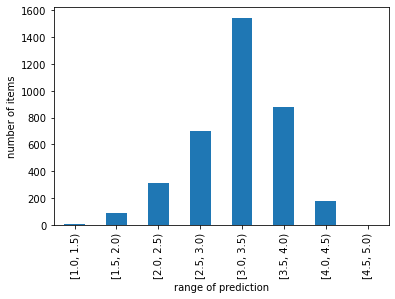

In [45]:
import numpy as np
import matplotlib.pyplot as plt


tmp = df.copy()
tmp["predictions"] = pd.cut(tmp.predictions, bins=ranges, right=False)
tmp = tmp.groupby("predictions").count()

ax = tmp.item_id.plot.bar()

ax.set_xlabel("range of prediction")
ax.set_ylabel("number of items")




In [27]:
df

,item_id,name,predictions
0,1193,One Flew Over the Cuckoo's Nest (1975),4.275939
1,661,James and the Giant Peach (1996),3.321860
2,914,My Fair Lady (1964),3.961499
3,3408,Erin Brockovich (2000),3.763712
4,2355,"Bug's Life, A (1998)",3.759617
...,...,...,...
919876,2198,Modulations (1998),3.406296
940262,2703,Broken Vessels (1998),3.306919
957826,2845,White Boys (1999),3.203340
970914,3607,One Little Indian (1973),3.399517


In [23]:
df.loc[df["predictions"] == df["predictions"].max()]

,item_id,name,predictions
21627,2905,Sanjuro (1962),4.465499


In [34]:
df.sort_values(by="predictions", ascending=False).head(10)

,item_id,name,predictions
21627,2905,Sanjuro (1962),4.465499
2185,2019,Seven Samurai (The Magnificent Seven) (Shichin...,4.415583
172,318,"Shawshank Redemption, The (1994)",4.403404
29,745,"Close Shave, A (1995)",4.390116
23,527,Schindler's List (1993),4.383325
3801,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.359447
761,1148,"Wrong Trousers, The (1993)",4.358988
903,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.339090
932,904,Rear Window (1954),4.337818
10930,1178,Paths of Glory (1957),4.331529


In [46]:
x =df.sort_values(by="predictions", ascending=False).head(10)
x

,item_id,name,predictions
21627,2905,Sanjuro (1962),4.465499
2185,2019,Seven Samurai (The Magnificent Seven) (Shichin...,4.415583
172,318,"Shawshank Redemption, The (1994)",4.403404
29,745,"Close Shave, A (1995)",4.390116
23,527,Schindler's List (1993),4.383325
3801,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.359447
761,1148,"Wrong Trousers, The (1993)",4.358988
903,750,Dr. Strangelove or: How I Learned to Stop Worr...,4.339090
932,904,Rear Window (1954),4.337818
10930,1178,Paths of Glory (1957),4.331529


In [66]:
top_10 = [[a]+[b] for a,b in zip(x.name.to_list() ,x.predictions.to_list())]

rated = [[a]+[b] for a,b in zip(tmp.reset_index().predictions.astype("str").to_list() ,tmp.item_id.to_list())]

In [5]:
import pandas as pd
df3 = pd.read_excel("/Users/damiangorcak/Downloads/jokes_data.xlsx",header=None)

df3

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
1,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
2,4.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
3,47.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,5.61,-4.51,0.00,0.0,99.00,0.00,5.93,4.19
4,13.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.00,0.0,99.00,99.00,99.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7694,27.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,0.00,99.00,0.00,0.00,0.00,99.0,0.00,0.00,0.00,99.00
7695,1.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,99.00,99.00,99.00,99.00,99.0,99.00,99.00,99.00,99.00
7696,26.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.00,8.63,99.00,6.76,0.00,3.5,6.26,99.00,-2.66,0.65
7697,64.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,2.03,99.00,2.05,2.05,0.73,0.0,2.97,0.57,0.00,0.00


In [79]:
df2["joke_id"] = df2.index
df2["joke_id"] = df2["joke_id"] + 1

df2.to_csv("joke.csv")


In [20]:

df3["index"]= df3.index


In [21]:
df_melt=pd.melt(df3, id_vars=["index"], value_vars=df3.columns)
df_melt=pd.melt(df3, id_vars=["index"], value_vars=df3.columns)
df_melt = df_melt.rename(columns={"index":"user_id","variable":"joke_id","value":"rating"})
df_melt.rating.astype("float")
df_melt = df_melt.loc[df_melt["rating"] != 99.00]
df_melt = df_melt.loc[df_melt["rating"] != -99.00]
df_melt['rating'] = df_melt['rating'].apply(lambda x: x/10.00 if x >= 10.00 else x)
df_melt['rating'] = df_melt['rating'].apply(lambda x: x/10.00 if x <= -10.00 else x)
df_melt
df_melt.to_csv("jokes_data.csv")

In [1]:
import pickle
with open("/Users/damiangorcak/Desktop/BP-app/static/datasets/RAW_interactions2_datasets.pkl", 'rb') as ds:
            dataset = pickle.load(ds)
            

In [2]:
df = dataset.ratings_graph(scatter=True)

In [8]:
tmp 

,number_of_ratings,item_id
0,1,91953
1,2,45120
2,3,25259
3,4,15712
4,5,10709
...,...,...
357,1322,1
358,1448,1
359,1579,1
360,1601,1


In [29]:
df = pd.read_csv("/Users/damiangorcak/Desktop/datasets/archive/rating.csv",encoding='latin-1', on_bad_lines='skip', sep=",")
df = df.loc[df["rating"] != -1]


In [233]:
df2 = pd.read_csv("/Users/damiangorcak/Desktop/datasets/archive/anime.csv",encoding='latin-1', on_bad_lines='skip', sep=",")

In [41]:
tmp = pd.merge(df, df2, how="left", on="anime_id")

In [68]:
tmp = df["rating"].value_counts().to_dict()

x = []
y= []

for key in tmp:
    x.append(key)
    y.append(tmp[key])

y

[1646019,
 1375287,
 1254096,
 955715,
 637775,
 282806,
 104291,
 41453,
 23150,
 16649]

In [78]:
x = df2.sort_values(by = 'genre')
x

,anime_id,name,genre,type,episodes,rating,members
7481,5869,Chou no Sainan,Action,Movie,1,5.38,619
6739,6721,Dark Side Cat,Action,ONA,6,5.96,1821
3368,5136,Flag Director&#039;s Edition: Issenman no Kufu...,Action,Movie,1,7.01,987
7933,5813,Urashima Tarou (1931),Action,Movie,1,4.58,841
2697,33080,Brotherhood: Final Fantasy XV,Action,ONA,5,7.18,29445
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,NaN,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,NaN,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,NaN,843
11112,33035,Yuyushiki Special,NaN,Special,1,NaN,2294


In [108]:
import itertools

arrs = df2.genre.str.split(pat=",").explode().unique() 

ini_dict =  { i : [] for i in arrs }

In [179]:
[ini_dict[a] for a,b in zip(rated.reset_index().predictions.astype("str").to_list() ,rated.item_id.to_list())]

NameError: name 'rated' is not defined

In [236]:
df2['genre']=df2['genre'].fillna("No genre")
tmp = [list([a,name] for a in x.split(',')) for x,name in zip(df2.genre.to_list(),df2.name.to_list())]

tmp

[[['Drama', 'Kimi no Na wa.'],
  [' Romance', 'Kimi no Na wa.'],
  [' School', 'Kimi no Na wa.'],
  [' Supernatural', 'Kimi no Na wa.']],
 [['Action', 'Fullmetal Alchemist: Brotherhood'],
  [' Adventure', 'Fullmetal Alchemist: Brotherhood'],
  [' Drama', 'Fullmetal Alchemist: Brotherhood'],
  [' Fantasy', 'Fullmetal Alchemist: Brotherhood'],
  [' Magic', 'Fullmetal Alchemist: Brotherhood'],
  [' Military', 'Fullmetal Alchemist: Brotherhood'],
  [' Shounen', 'Fullmetal Alchemist: Brotherhood']],
 [['Action', 'GintamaÂ°'],
  [' Comedy', 'GintamaÂ°'],
  [' Historical', 'GintamaÂ°'],
  [' Parody', 'GintamaÂ°'],
  [' Samurai', 'GintamaÂ°'],
  [' Sci-Fi', 'GintamaÂ°'],
  [' Shounen', 'GintamaÂ°']],
 [['Sci-Fi', 'Steins;Gate'], [' Thriller', 'Steins;Gate']],
 [['Action', 'Gintama&#039;'],
  [' Comedy', 'Gintama&#039;'],
  [' Historical', 'Gintama&#039;'],
  [' Parody', 'Gintama&#039;'],
  [' Samurai', 'Gintama&#039;'],
  [' Sci-Fi', 'Gintama&#039;'],
  [' Shounen', 'Gintama&#039;']],
 [['Come

In [246]:
from surprise import Dataset
from surprise import Reader
from surprise import trainset
from surprise.model_selection import train_test_split
reader = Reader(rating_scale=(0,5))
a= pd.read_csv("/Users/damiangorcak/Desktop/datasets/ratings1.csv",encoding='latin-1', on_bad_lines='skip', sep=",")

data = Dataset.load_from_df(df=a[['user_id', 'movie_id', 'rating']], reader=reader)
train, test = train_test_split(data, test_size=.1)

In [252]:
from bayes_opt import BayesianOptimization
import time
from surprise import BaselineOnly
from surprise import accuracy

times = []

tuning_params = dict()
tuning_params = { 
  "k": [1,100],
  "learning_rate": [0.001, 0.1],
  "u": [0.1,1],
  "i": [0.1,1]
 }

def BO_func(k, learning_rate, u, i):

      k = k.astype(int)
      u = u.astype(int)
      i = i.astype(int)
      
      bsl_options = {'method': 'sgd',
               'n_epochs': k,
               'learning_rate': learning_rate,
               'reg_u': u,
               'reg_i': i
               }

      algo = BaselineOnly(bsl_options=bsl_options)
      start = time.time()
      algo.fit(train)
      end = time.time()
      predictions = algo.test(test)
      times.append(end-start)

      return accuracy.rmse(predictions)



optimizer = BayesianOptimization(
    f = BO_func,
    pbounds = tuning_params,
    verbose = 5,
    random_state = 5, 
)

optimizer.maximize(
  init_points = 10,
  n_iter = 10, 
 )

counter = 0
values_sgd = [dict(optimizer.res[i], **{'time':times[i]}) for i in range(len(optimizer.res))]


|   iter    |  target   |     i     |     k     | learni... |     u     |
-------------------------------------------------------------------------
Estimating biases using sgd...
RMSE: 0.9182
|  1        |  0.9182   |  0.2998   |  87.2     |  0.02147  |  0.9267   |
Estimating biases using sgd...
RMSE: 0.9460
|  2        |  0.946    |  0.5396   |  61.56    |  0.07682  |  0.5666   |
Estimating biases using sgd...
RMSE: 0.9121
|  3        |  0.9121   |  0.3671   |  19.58    |  0.008993 |  0.7646   |
Estimating biases using sgd...
RMSE: 0.9519
|  4        |  0.9519   |  0.4972   |  16.67    |  0.08811  |  0.3467   |
Estimating biases using sgd...
RMSE: 0.9388
|  5        |  0.9388   |  0.4728   |  30.31    |  0.06325  |  0.6219   |
Estimating biases using sgd...
RMSE: 0.9218
|  6        |  0.9218   |  0.6399   |  27.32    |  0.02918  |  0.3282   |
Estimating biases using sgd...
RMSE: 0.9160
|  7        |  0.916    |  0.3948   |  15.27    |  0.0174   |  0.9675   |
Estimating biases using sg

In [157]:
df2.loc[df2["genre"] == None, 'genre'] = 'No genre'

In [174]:
for i in df2.genre.str.split(pat=",").to_list():
    for x in i:
        if type(x) == "float":
            print(x)

TypeError: 'float' object is not iterable

In [2]:
import pandas as pd
a= pd.read_csv("/Users/damiangorcak/Desktop/datasets/movie_item.csv",encoding='latin-1', on_bad_lines='skip', sep=",")
a

,movie_id,name,genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama
